# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
print('X: Number of instances: {}, number of attributes: {}'.format(X.shape[0], X.shape[1]))
print('y: Number of instances: {}'.format(y.shape[0]))
print('y is the array: {}'.format(y))
X.head(10)

X: Number of instances: 2845, number of attributes: 1000
y: Number of instances: 2845
y is the array: ['rec.sport.baseball' 'rec.sport.baseball' 'rec.sport.hockey' ...,
 'comp.sys.ibm.pc.hardware' 'rec.sport.hockey' 'rec.sport.hockey']


,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.133553,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.420916,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Answer: *
As seen from the sklearn documentation, the data displayed above had to be extracted from the raw data (text). We can see that the vectors are very sparse with most values being zero. We have 2845 vectors, each having 1000 attributes (most values being zero). The rows are a bag of words features, showing the words in it. This helps in clustering when observing common words.

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
# Initialise a k-means clustering object, ensuring we can reproduce results by setting random_state
kmeans = KMeans(n_clusters = 5, random_state = 1030).fit(X)
# kmeans.labels_

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
# Avg distance of a data point from the centre
mean_dp_set = X.mean(axis=0)
eucl_dist = np.sqrt(((X-mean_dp_set)**2).sum(axis=0))

print('Euclidean Distances shape: {}'.format(eucl_dist))
print('inertia: {}'.format(kmeans.inertia_))
print('adjusted rand index: {}'.format(adjusted_rand_score(y, kmeans.labels_)))

Euclidean Distances shape: abc          1.611806
ability      1.105988
able         1.846820
ac           1.231879
accept       1.153732
access       1.605792
according    1.437643
acquired     0.867910
actually     2.342264
adaptec      1.387961
adapter      1.169188
add          1.747221
address      2.332358
advance      2.069237
advantage    1.192262
advice       1.340352
ago          1.818669
agree        1.845049
ahead        1.201588
ahl          1.123237
al           1.751962
allow        1.221120
allowed      1.042757
allows       0.963680
alomar       2.266074
alt          1.504428
american     1.287657
amour        0.710324
andrew       1.378592
angeles      0.790113
               ...   
wings        1.561397
winner       1.333164
winning      1.264028
winnipeg     0.921034
wins         1.567236
wish         1.118400
women        1.625050
won          2.075284
wonder       1.420371
wondering    1.761410
word         1.845654
words        1.532500
work         2.366838
worki

*Answer: * 
1. Adjusted rand score measures the similarity between the true class labels of the data and the assigned class labels of the data by the clustering algorithm. If 1.0 is the perfect score, then our clustering algorithm didn't perform very well.

2. Inertia is the sum of squares, within each cluster. It shows the coherence of each cluster internally. Values closer to zero are better, therefore this measure again shows that our clustering needs improvement.

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [7]:
# We have 5 distinct labels - clusters
# Cound the occurence of each in y
count1 = y.tolist().count('alt.atheism')
count2 = y.tolist().count('comp.sys.ibm.pc.hardware')
count3 = y.tolist().count('comp.sys.mac.hardware')
count4 = y.tolist().count('rec.sport.baseball')
count5 = y.tolist().count('rec.sport.hockey')

print('Number of datapoints in label 1: {}'.format(count1))
print('Number of datapoints in label 2: {}'.format(count2))
print('Number of datapoints in label 3: {}'.format(count3))
print('Number of datapoints in label 4: {}'.format(count4))
print('Number of datapoints in label 5: {}'.format(count5))

# Count the occurences of each label from kmeans
assigned_data = np.zeros(5, int)
for label in kmeans.labels_:
    assigned_data[label] += 1

for i in range(5):
    print('Number of datapoints assigned to cluster {}: {}'.format(i+1, assigned_data[i]))

Number of datapoints in label 1: 480
Number of datapoints in label 2: 590
Number of datapoints in label 3: 578
Number of datapoints in label 4: 597
Number of datapoints in label 5: 600
Number of datapoints assigned to cluster 1: 1052
Number of datapoints assigned to cluster 2: 680
Number of datapoints assigned to cluster 3: 538
Number of datapoints assigned to cluster 4: 348
Number of datapoints assigned to cluster 5: 227


*Answer: * The distribution of data points to cluster centres is uneven compared to the actual labels. We see that the amount of data assigned to label 1 is more than double than the actual label's count. Also, label 5's assigned data is less than half of what it should be.

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
from scipy.spatial import distance_matrix

dist_matrix = distance_matrix(kmeans.cluster_centers_, kmeans.cluster_centers_)
print(dist_matrix)

[[ 0.          0.19062249  0.20966389  0.22651753  0.34021225]
 [ 0.19062249  0.          0.29456134  0.27983294  0.31846627]
 [ 0.20966389  0.29456134  0.          0.2941995   0.40981375]
 [ 0.22651753  0.27983294  0.2941995   0.          0.40076383]
 [ 0.34021225  0.31846627  0.40981375  0.40076383  0.        ]]


### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

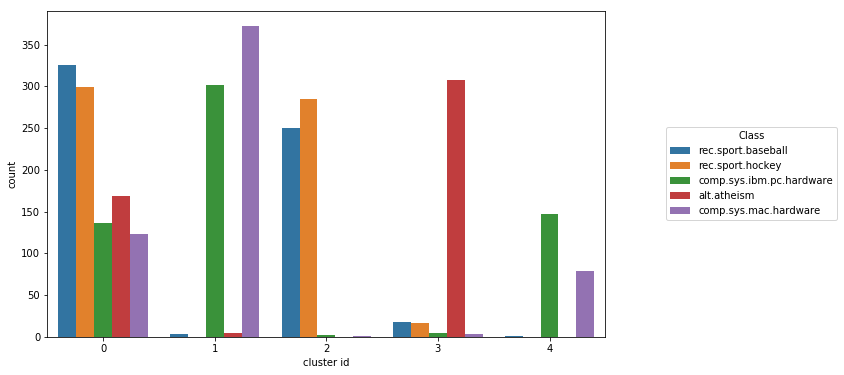

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=[1.1, 0.5], title='Class')
plt.xlabel('cluster id')
plt.show()

*Answer: * Firstly, we notice that most of cluster 3 is assigned to alt.atheism. Then, for cluster 0 we have multiple assignments. The rest of the clusters have the most data split in two assignments of classes.

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [10]:
n_components = [1,2,3,5,10,20,50,100,500,1000]
scores = list()
iteration = 1
for n in n_components:
    pca = PCA(n_components = n)
    X_reduced = pca.fit_transform(X)
    kmeans_pca = KMeans(n_clusters = 5, random_state = 1337).fit(X_reduced)
    print('Iteration {}, n = {}'.format(iteration, n))
    print('inertia: {}'.format(kmeans_pca.inertia_))
    score = adjusted_rand_score(y, kmeans_pca.labels_)
    scores.append(score)
    print('adjusted rand index: {}'.format(score))
    iteration += 1

Iteration 1, n = 1
inertia: 2.82138052927
adjusted rand index: 0.21016016537
Iteration 2, n = 2
inertia: 10.5765369168
adjusted rand index: 0.267455202068
Iteration 3, n = 3
inertia: 20.4312049439
adjusted rand index: 0.238710897956
Iteration 4, n = 5
inertia: 49.8605072477
adjusted rand index: 0.227958102442
Iteration 5, n = 10
inertia: 117.779912325
adjusted rand index: 0.214488179217
Iteration 6, n = 20
inertia: 230.917740577
adjusted rand index: 0.209878394409
Iteration 7, n = 50
inertia: 488.644333768
adjusted rand index: 0.194170900305
Iteration 8, n = 100
inertia: 801.671048037
adjusted rand index: 0.189974312553
Iteration 9, n = 500
inertia: 2132.04645192
adjusted rand index: 0.185202307723
Iteration 10, n = 1000
inertia: 2593.25614178
adjusted rand index: 0.218195977083


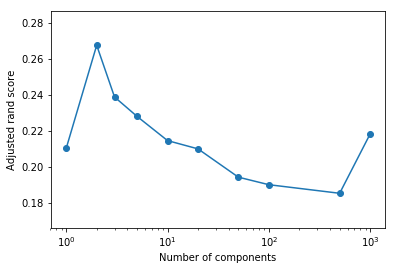

In [11]:
# Plot scores against the components on log scale
plt.scatter(n_components, scores)
plt.plot(n_components, scores)
plt.xscale('log')
plt.xlabel('Number of components')
plt.ylabel('Adjusted rand score')
plt.show()

*Answer: * The graph shows the performance of the clustering algorithm for each number of components used. We can see that the highest adjusted rand score was achieved using only two principal components.

We cannot use inertia to select number of principal components because it's not normalised on the data and suffers from high dimensionality as Euclidean distances become inflated.

This issue can be resolved by applying dimensionality reduction, as the Euclidean distances won't go to huge extends.

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

In [12]:
pca_2 = PCA(n_components = 2)
X_2d = pca_2.fit_transform(X)
kmeans_pca = KMeans(n_clusters = 5, random_state = 88).fit(X_2d)
print('inertia: {}'.format(kmeans_pca.inertia_))
print('adjusted rand index: {}'.format(adjusted_rand_score(y, kmeans_pca.labels_)))

inertia: 10.5781709357
adjusted rand index: 0.268057114859


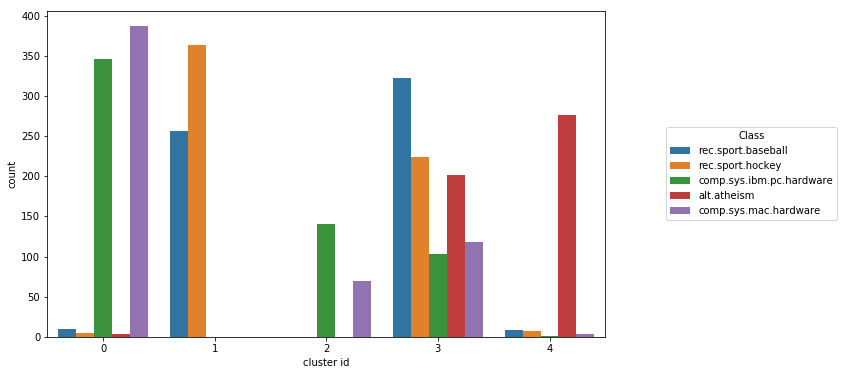

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=[1.1, 0.5], title='Class')
plt.xlabel('cluster id')
plt.show()

In [14]:
# Count the occurences of each label from kmeans
assigned_data_2 = np.zeros(5, int)
for label in kmeans_pca.labels_:
    assigned_data_2[label] += 1

for i in range(5):
    print('Number of datapoints assigned to cluster {}: {}'.format(i, assigned_data_2[i]))

Number of datapoints assigned to cluster 0: 751
Number of datapoints assigned to cluster 1: 620
Number of datapoints assigned to cluster 2: 209
Number of datapoints assigned to cluster 3: 968
Number of datapoints assigned to cluster 4: 297


*Answer: * Looking at this graph, we can see a slight improvement as not as many data is clustered in 1 cluster. We can see a slight leaning towards one class in clusters, but still not good enough.

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [15]:
# Use the cats array from Q1.0 which specifies the different classes
# Those can indicate the cluster label
labels_interp = np.array(cats)[kmeans.labels_]
print(kmeans.labels_)
print(labels_interp)

[0 2 2 ..., 4 2 0]
['alt.atheism' 'comp.sys.mac.hardware' 'comp.sys.mac.hardware' ...,
 'rec.sport.hockey' 'comp.sys.mac.hardware' 'alt.atheism']


### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

In [16]:
# Get confusion matrix
cm = confusion_matrix(y, labels_interp)
# Normalise it by the true classes
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[ 0.35208333,  0.00833333,  0.        ,  0.63958333,  0.        ],
       [ 0.23050847,  0.51016949,  0.00338983,  0.00677966,  0.24915254],
       [ 0.21280277,  0.64359862,  0.0017301 ,  0.00519031,  0.1366782 ],
       [ 0.54438861,  0.00502513,  0.41876047,  0.03015075,  0.00167504],
       [ 0.49833333,  0.        ,  0.475     ,  0.02666667,  0.        ]])

In [17]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

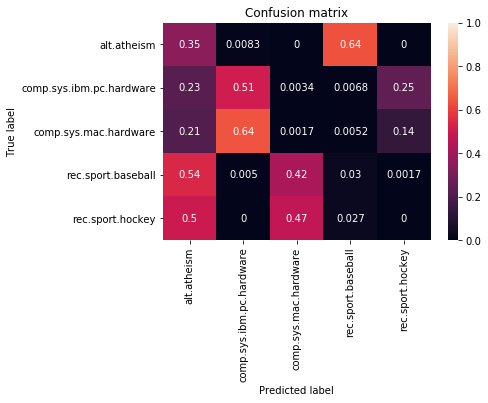

In [18]:
plt.figure()
plot_confusion_matrix(cm_norm, classes=cats)

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

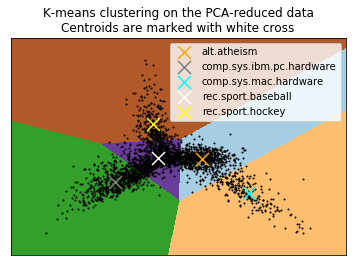

In [19]:
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - 0.1, X_2d[:, 0].max() + 0.1
y_min, y_max = X_2d[:, 1].min() - 0.1, X_2d[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
    
fig, ax = plt.subplots(figsize = (10,6))
plt.figure(1)
plt.clf()
plt.figure()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)

# Plot the centroids and create the legend
centroids = kmeans_pca.cluster_centers_
colors = ['orange', 'grey', 'cyan', 'white', 'yellow']
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], cats):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=169, linewidths=3, color=color, zorder=10,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('K-means clustering on the PCA-reduced data\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

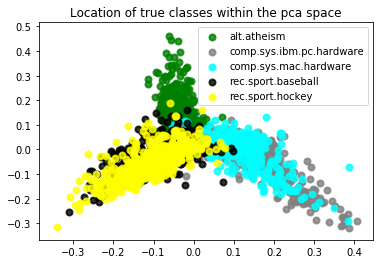

In [20]:
# Show where the true classes lie within the pca space
plt.figure()
colors = ['green', 'grey', 'cyan', 'black', 'yellow']
lw = 2

for color, i, target_name in zip(colors, cats, cats):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Location of true classes within the pca space')
plt.show()

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Answer: *
1. The kmeans algorithm is deterministic as it uses Euclidean distances to determine where to assign a data point. The only thing random is the initialisation part of the algorithm that chooses random centroid points to begin checking for convergence.
2. -
3. Another method for initialising is 'random', which selects randomly k data and sets them to be the initial centroids. This can lead to the kmeans to be very slow to converge or even to reach local minimum that is not accurate.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [22]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [23]:
# Create a dataframe of the data and display the first 10 rows to have a look
data = pd.DataFrame(digits.data)
print('Number of instances: {}, number of attributes: {}'.format(data.shape[0], data.shape[1]))
data.head(10)

Number of instances: 1797, number of attributes: 64


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [24]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [25]:
maxes = data.max(axis = 0)
# maxes

In [26]:
mins = data.min(axis = 0)
# mins

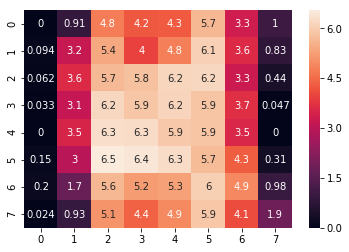

In [27]:
stds = data.std(axis = 0)
stds_reshaped = stds.values.reshape(8,8)
sns.heatmap(stds_reshaped, annot = True)

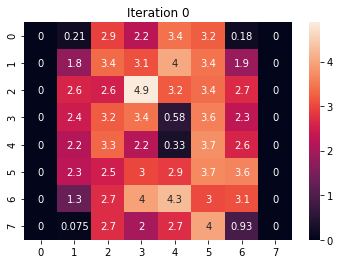

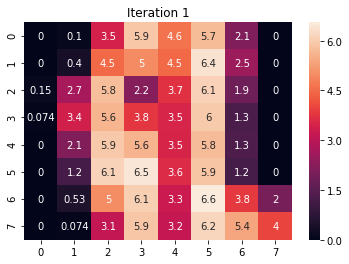

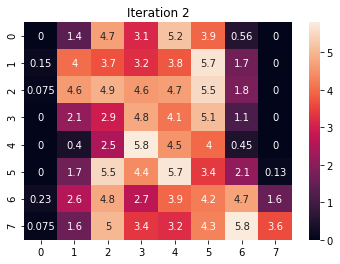

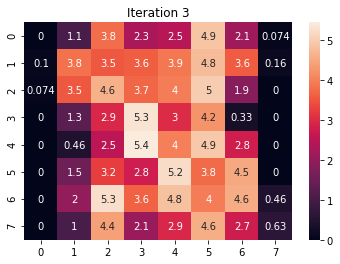

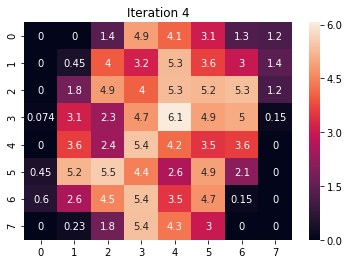

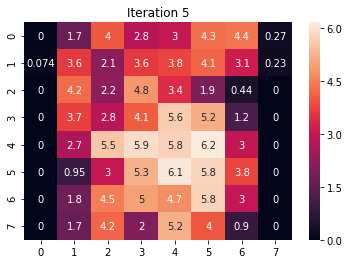

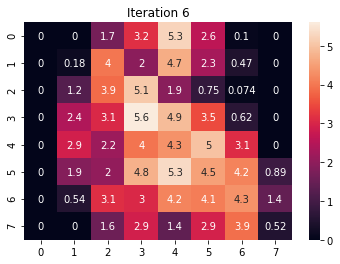

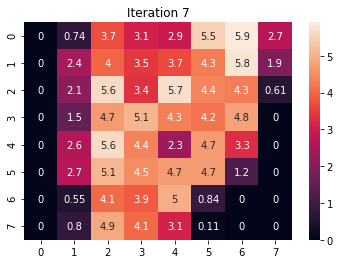

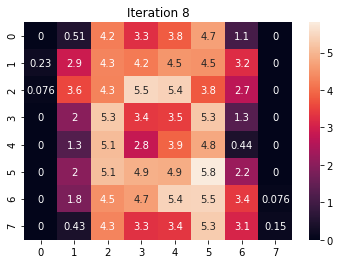

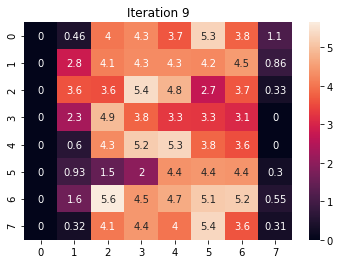

In [28]:
# Group the digits and get the s.d
grouped_data = data.groupby(digits.target).std()
grouped_data = np.array(grouped_data)
for i in range(grouped_data.shape[0]):
    fig, ax = plt.subplots(figsize = (6,4))
    gd = grouped_data[i].reshape(8,8)
    sns.heatmap(gd, annot = True)
    plt.title('Iteration {}'.format(i))
    plt.show()

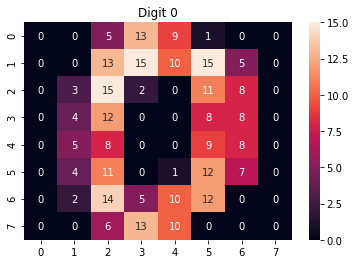

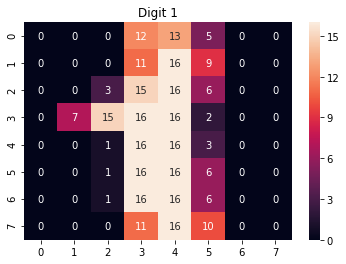

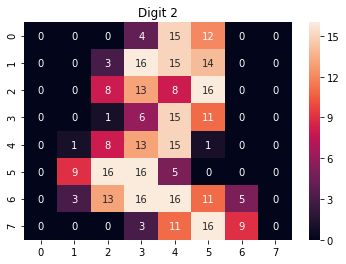

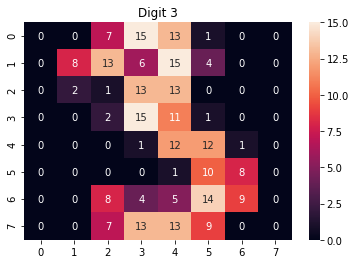

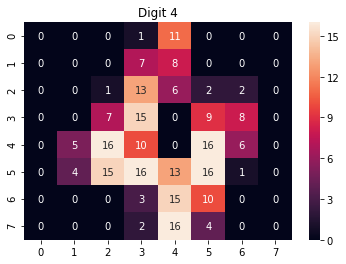

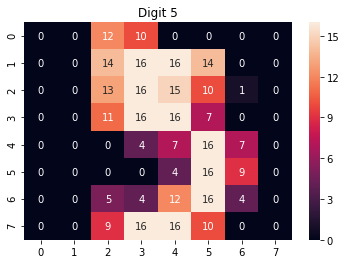

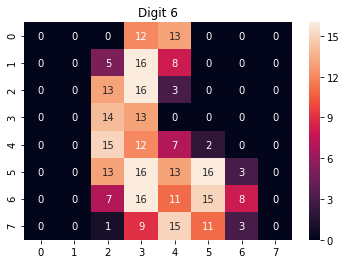

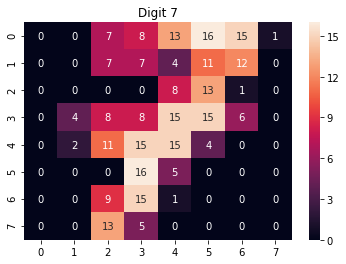

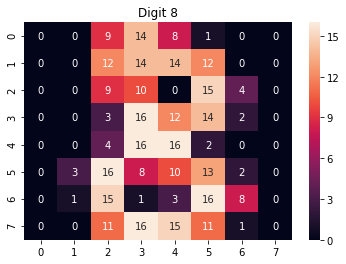

In [29]:
# Get the first 9 rows from data
for i in range(9):
    fig, ax = plt.subplots(figsize = (6,4))
    digit = data.iloc[i].values.reshape(8,8)
    sns.heatmap(digit, annot = True)
    plt.title('Digit {}'.format(i))
    plt.show()

Answer:

As shown above, the max of any of the dimensions as expected does not exceed 16.0. The min value for all dimensions is 0.0.

Now, as for the dimensions importance, we deduce that not all dimensions are equally helpful for modelling. These are the dimensions that represent the pixels near the sides and corners of the images. They don't carry much useful information as they do not include much of the handwriting as we can see from the above plots(0,7 in all plots in 8x8 grid). 

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

Number of Eigenvectors needed: 29


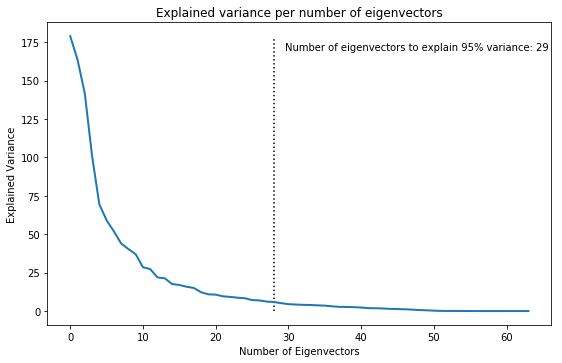

In [30]:
X_digits = digits.data
y_digits = digits.target
pca = PCA(n_components = digits.data.shape[1])

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(10, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Explained Variance')
plt.title('Explained variance per number of eigenvectors')

# Find the point where 95% of the variance has been explained
current, summ = 0, 0
for i in range(64):
    current = pca.explained_variance_ratio_[i]
    summ += current
    if summ >= 0.95:
        var_explained_index = i
        break

# Eigenvectors needed are the index + 1
print('Number of Eigenvectors needed: {}'.format(var_explained_index + 1))
plt.vlines(var_explained_index, 0, 177, color='k',linestyles='dotted')
plt.annotate('Number of eigenvectors to explain 95% variance: {}'.format(var_explained_index + 1), 
             xy=(var_explained_index + 1.5, 170))

Answer: Choosing 95% is a good threshold value when selecting how many eigenvectors are needed to explain the most variance. The PCA documentation indicates that the eigenvectors are sorted according to the explained_variance attribute, therefore we didn't have to sort them from largest to least impact. We have shown that 95% of the variance is explained by 29 eigenvectors. Therefore, less than half of the eigenvectors are enough to explain the most variance. This suggests that we can reduce the size of our data dimensions to reflect this.

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

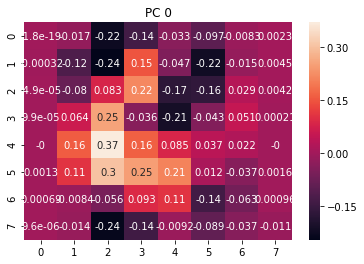

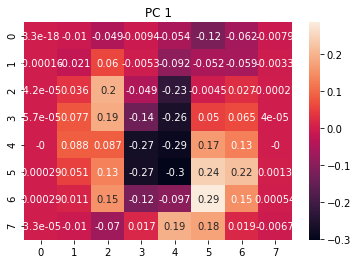

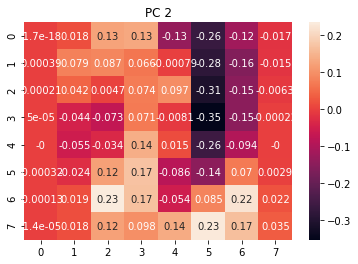

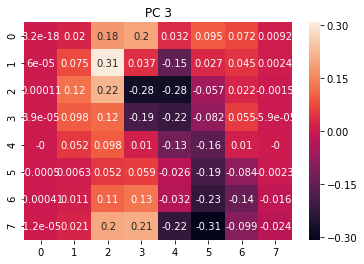

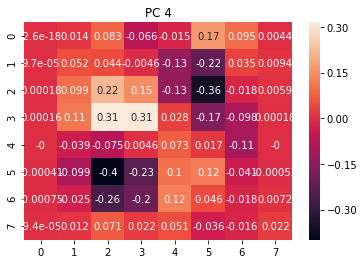

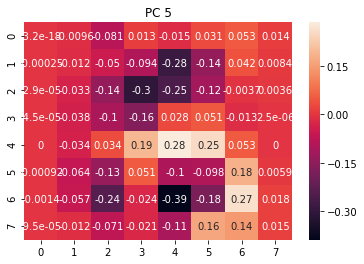

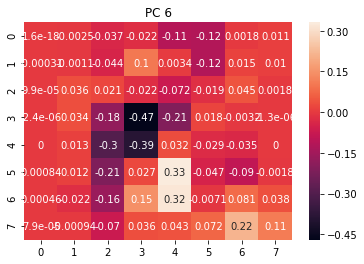

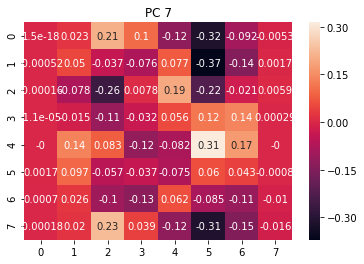

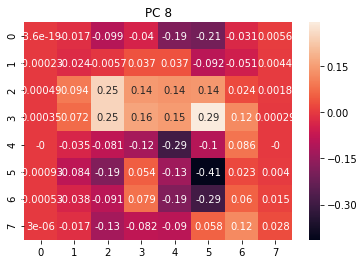

In [31]:
# Plot the first 9 PCs
for i in range(9):
    fig, ax = plt.subplots(figsize = (6,4))
    pc = pca.components_[i].reshape(8,8)
    sns.heatmap(pc, annot = True)
    plt.title('PC {}'.format(i))
    plt.show()

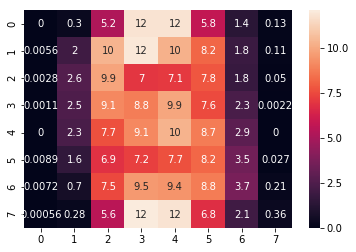

In [32]:
# Plot the mean of pca
sns.heatmap(pca.mean_.reshape(8,8), annot = True)

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

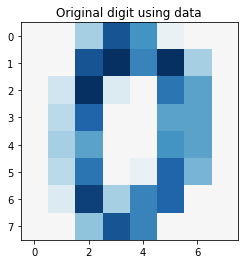

In [33]:
# Original digit
original_digit = digits.data[0,:]

scale = np.abs(original_digit).max()

plt.figure()
plt.imshow(original_digit.reshape(8,8),interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
plt.title('Original digit using data')
plt.show()

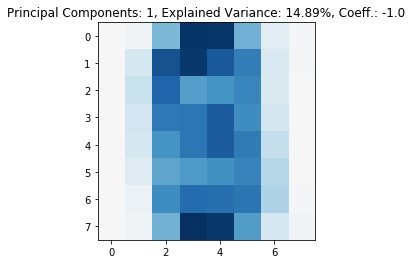

In [34]:
# Digit reconstructed using 1 principal component
x = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
# Multiply the principal component with the first coefficient and add to the mean
m1 = np.dot(pca.components_[0], x[0]) + pca.mean_

scale = np.abs(m1).max()

plt.figure()
plt.imshow(m1.reshape(8,8),interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)

exp_var = round((pca.explained_variance_ratio_[0] * 100), 2)
coef = np.round(x[0])
plt.title('Principal Components: 1, Explained Variance: {}%, Coeff.: {}'.format(exp_var, coef))
plt.show()
# If ran from the top the plots below are shown correctly. When this is ran individually, it shows the 
# original digit plot for some reason. (bug?)
# If this plot is exactly the same as the original digit, please rerun the whole thing.

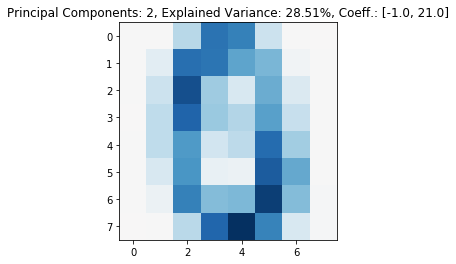

In [35]:
# Digit reconstructed using 2 principal component
x = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
m2 = pca.mean_
exp_var = 0
# Multiply each principal component with respective coefficient and add to the mean
for i in range(2):
    m2 += np.dot(pca.components_[i], x[i])
    exp_var += pca.explained_variance_ratio_[i]
    
scale = np.abs(m2).max()
plt.imshow(m2.reshape(8,8),interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)

exp_var = round((exp_var * 100), 2)
coef = [np.round(x[0]), np.round(x[1])]
plt.title('Principal Components: 2, Explained Variance: {}%, Coeff.: {}'.format(exp_var, coef))

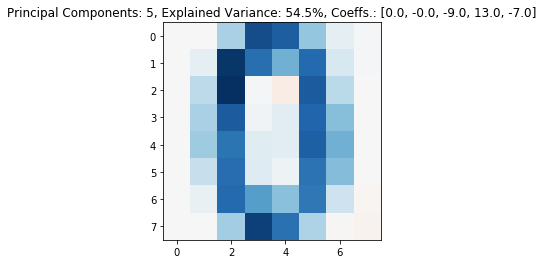

In [36]:
# Digit reconstructed using 5 principal components
x = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
m5 = pca.mean_
exp_var = 0
# Multiply each principal component with respective coefficient and add to the mean
for i in range(5):
    m5 += np.dot(pca.components_[i], x[i])
    exp_var += pca.explained_variance_ratio_[i]

scale = np.abs(m5).max()
plt.imshow(m5.reshape(8,8),interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)

exp_var = round((exp_var * 100), 2)
coef = [np.round(x[0]), np.round(x[1]), np.round(x[2]), np.round(x[3]), np.round(x[4])]
plt.title('Principal Components: 5, Explained Variance: {}%, Coeffs.: {}'.format(exp_var, coef))

*Answer: * The eigenvectors produce realistic data. We can see that as we use more eigenvectors the digit starts getting more shape. Below I provide the digit constructed using all eigenvectors, which is clear proof that it does produce realistic data.

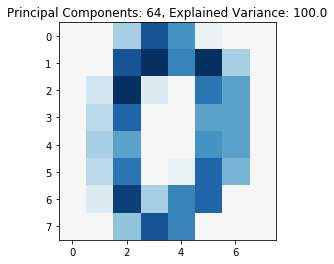

In [37]:
# Digit reconstructed using ALL principal components
x = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
m = pca.mean_
exp_var = 0
for i in range(64):
    m += np.dot(pca.components_[i], x[i])
    exp_var += pca.explained_variance_ratio_[i]
    
scale = np.abs(m).max()
plt.imshow(m.reshape(8,8),interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)

exp_var = round((exp_var * 100), 2)
plt.title('Principal Components: 64, Explained Variance: {}'.format(exp_var))

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [38]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [39]:
def plot_and_print(results):
    # Plot accuracy
    folds = np.arange(1,6)
    plt.scatter(folds, results)
    plt.plot(folds, results)
    plt.ylabel('Performance')
    plt.xlabel('Fold')
    plt.show()
    
    mean = np.mean(results, axis = 0)
    print('Classification accuracy (mean fold score): {:.3f}'.format(mean))

In [40]:
def create_svc_model(k_fold, tr_set, target_tr, results):
    k = 0
    for train_index, test_index in k_fold.split(tr_set):
        X_train, X_test = tr_set[train_index], tr_set[test_index]
        svc_linear = SVC(kernel = 'linear', random_state = 31)
        svc_linear.fit(X_train, target_tr[train_index])
        results[k] = svc_linear.score(X_test, target_tr[test_index])
        print("Fold {} Score: {}".format(k+1, results[k]))
        k += 1
    
    plot_and_print(results)

Fold 1 Score: 0.977777777778
Fold 2 Score: 0.983333333333
Fold 3 Score: 0.988857938719
Fold 4 Score: 0.988857938719
Fold 5 Score: 0.983286908078


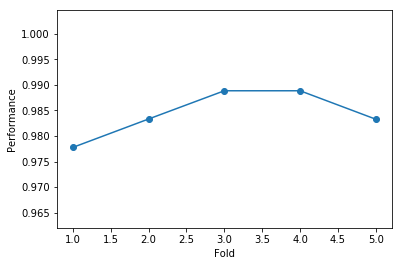

Classification accuracy (mean fold score): 0.984


In [41]:
# SVC with a linear kernel, no shrinking, and a random_state on digit data
outcome_svc = np.zeros(5)
create_svc_model(k_fold, X_digits, y_digits, outcome_svc)

Fold 1 Score: 0.977777777778
Fold 2 Score: 0.983333333333
Fold 3 Score: 0.988857938719
Fold 4 Score: 0.988857938719
Fold 5 Score: 0.983286908078


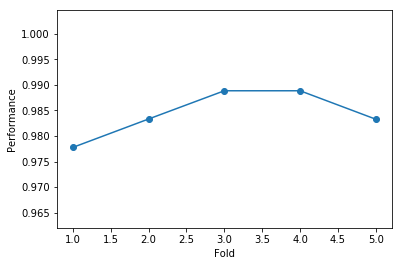

Classification accuracy (mean fold score): 0.984


In [42]:
# SVC with a linear kernel, no shrinking, and the same random_state on 
# pca transformed digit data (use the full 64 component pca above)
outcome_svc_pca = np.zeros(5)
transformed = pca.transform(X = X_digits)
create_svc_model(k_fold, transformed, y_digits, outcome_svc_pca)

In [43]:
def create_gaussian_model(k_fold, tr_set, target_tr, results):
    k = 0
    for train_index, test_index in k_fold.split(tr_set):
        X_train, X_test = tr_set[train_index], tr_set[test_index]
        gnb = GaussianNB()
        gnb.fit(X_train, target_tr[train_index])
        results[k] = gnb.score(X_test, target_tr[test_index])
        print("Fold {} Score: {}".format(k+1, results[k]))
        k += 1
    
    plot_and_print(results)

Fold 1 Score: 0.825
Fold 2 Score: 0.841666666667
Fold 3 Score: 0.83008356546
Fold 4 Score: 0.841225626741
Fold 5 Score: 0.83008356546


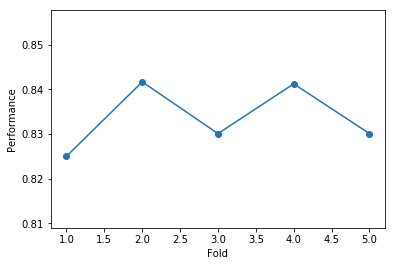

Classification accuracy (mean fold score): 0.834


In [44]:
# Gaussian Naive Bayes Classifier on digit data
outcome_gnb = np.zeros(5)
create_gaussian_model(k_fold, X_digits, y_digits, outcome_gnb)

Fold 1 Score: 0.863888888889
Fold 2 Score: 0.880555555556
Fold 3 Score: 0.91643454039
Fold 4 Score: 0.891364902507
Fold 5 Score: 0.891364902507


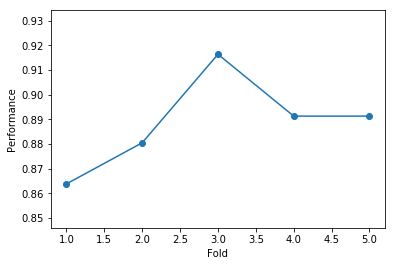

Classification accuracy (mean fold score): 0.889


In [45]:
# Gaussian Naive Bayes Classifier on pca transformed 
# digit data (use the full 64 component pca above)
outcome_gnb_pca = np.zeros(5)
create_gaussian_model(k_fold, transformed, y_digits, outcome_gnb_pca)

*Answer: * Gaussian classifier improved when applying PCA and SVC did not. PCA maximizes overall variance of the data along a set of directions (therefore makes features independent)and this improves the gaussian classification but not the linear kernel used for the SVC.